In [8]:
import serial
import pandas as pd
from datetime import datetime
import time

# Setup the serial connection (Change 'COM3' to your Arduino's port)
ser = serial.Serial('COM9', 9600, timeout=1)
time.sleep(2)  # wait for the serial connection to initialize

data = {
    'Timestamp': [],
    'Temperature1': [],
    'Temperature2': [],
    'AverageTemperature': [],
    'Humidity': [],
    'Gas': [],
    'Pressure': []
}

try:
    while True:
        line = ser.readline().decode('utf-8').rstrip()
        
        if line:
            print(line)  # Print the line for debugging purposes
            try:
                # Assuming the line is in the format "Humidity: xx | Temperature: yy | Gas: zz | Pressure: aa"
                parts = line.split('|')
                humidity = float(parts[0].split(':')[1].strip())
                temp1 = float(parts[1].split(':')[1].strip())
                temp2 = float(parts[2].split(':')[1].strip())
                gas = float(parts[3].split(':')[1].strip())
                pressure = float(parts[4].split(':')[1].strip())

                # Calculate the average temperature
                avg_temp = (temp1 + temp2) / 2

                # Append the data
                data['Timestamp'].append(datetime.now())
                data['Temperature1'].append(temp1)
                data['Temperature2'].append(temp2)
                data['AverageTemperature'].append(avg_temp)
                data['Humidity'].append(humidity)
                data['Gas'].append(gas)
                data['Pressure'].append(pressure)
            except Exception as e:
                print(f"Error parsing data: {e}")

except KeyboardInterrupt:
    # User interrupted the process, convert the data to a DataFrame
    df = pd.DataFrame(data)
    print(df)
    ser.close()


3
Error parsing data: list index out of range
ssure: 1009.35 | Temperature: 21.03
Error parsing data: list index out of range
Humidity: 13.10 | Temperature: 20.30 | Gas: 45 | Pressure: 1009.35 | Temperature: 21.03
Initiated
Error parsing data: list index out of range
DHT Temperature and humidity sensor connected
Error parsing data: list index out of range
MQ Gas sensor connected
Error parsing data: list index out of range
Configuring BMP sensor...
Error parsing data: list index out of range
BMP sensor configured.
Error parsing data: list index out of range
Humidity: 13.10 | Temperature: 20.30 | Gas: 45 | Pressure: 782.00 | Temperature: 22.31
Humidity: 13.10 | Temperature: 20.30 | Gas: 45 | Pressure: 1009.35 | Temperature: 21.03
Humidity: 13.20 | Temperature: 20.30 | Gas: 45 | Pressure: 1009.36 | Temperature: 21.03
Humidity: 13.20 | Temperature: 20.30 | Gas: 45 | Pressure: 1009.37 | Temperature: 21.03
Humidity: 13.10 | Temperature: 20.30 | Gas: 45 | Pressure: 1009.36 | Temperature: 21.0

14:55 - Tørris satt ved sensor
15:21 - Flyttet tørris til andre sensor
16:06 - fjerner tørris
16:12 - laserkutter starter
16:25 - åpner laserkutter
16:36 - åpne laser 2
17:22 - åpne vindu
17:23 - åpne vindu 2 (gjennomtrekk)
17:36 - lukker vindu

In [9]:
df.to_csv("Test1.csv")

In [13]:
print(df)

                       Timestamp  Temperature1  Temperature2  \
0     2023-11-28 13:31:45.505045          20.3          45.0   
1     2023-11-28 13:31:48.625103          20.3          45.0   
2     2023-11-28 13:31:49.663631          20.3          45.0   
3     2023-11-28 13:31:50.693059          20.3          45.0   
4     2023-11-28 13:31:51.711149          20.3          45.0   
...                          ...           ...           ...   
18477 2023-11-28 18:48:59.734001          20.4          45.0   
18478 2023-11-28 18:49:00.761763          20.4          45.0   
18479 2023-11-28 18:49:01.793350          20.4          45.0   
18480 2023-11-28 18:49:02.822090          20.4          45.0   
18481 2023-11-28 18:49:03.854931          20.4          45.0   

       AverageTemperature  Humidity      Gas  Pressure  
0                   32.65      13.1  1009.35     21.03  
1                   32.65      13.1   782.00     22.31  
2                   32.65      13.1  1009.35     21.03  
3  

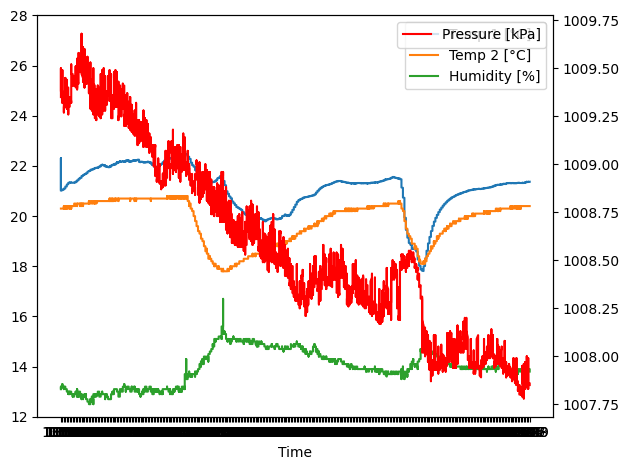

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

df = pd.read_csv('Test1.csv')
#print(df)

df['Time'] = pd.to_datetime(df['Timestamp']).dt.strftime('%H:%M')
df['Pressure2'] = df['Gas'].apply(lambda x: x if x >= 1005 else 1009.5)

#df.head()
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time')
plt.plot(df['Time'],df['Pressure'],label="Temp 1 [°C]")
plt.plot(df['Time'],df['Temperature1'], label="Temp 2 [°C]")
plt.plot(df['Time'],df['Humidity'], label = "Humidity [%]")
#plt.plot(df['Time'],df['Temperature2'], label = "Gas [ppm]")
plt.ylim(12, 28)
plt.legend()

ax2 = ax1.twinx()
plt.plot(df['Time'],df['Pressure2'],label="Pressure [kPa]", color='Red')
plt.ylim=(1005,1009.75)

#plt.xticks((10,10))
fig.tight_layout()
plt.legend()
#plt.plot(df['Gas'])

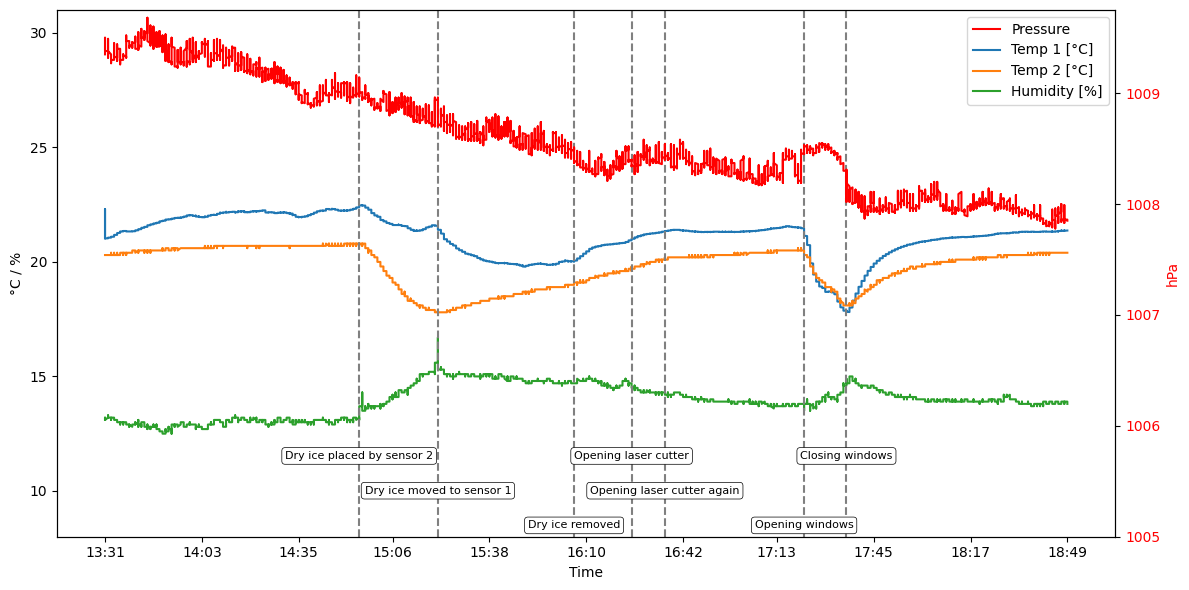

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates

# Assuming df is already defined, as the actual data from 'Test1.csv' is not available in this environment.
df = pd.read_csv('Test1.csv')

events = {"14:55": "Dry ice placed by sensor 2","15:21":"Dry ice moved to sensor 1", "16:06": "Dry ice removed", "16:25": "Opening laser cutter", "16:36": "Opening laser cutter again", "17:22":"Opening windows","17:36":"Closing windows"}

# Sample code modification based on the provided code
df['Time'] = pd.to_datetime(df['Timestamp']).dt.strftime('%H:%M')
df['Pressure2'] = df['Gas'].apply(lambda x: x if x >= 1005 else 1009.5)

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_xlabel('Time')
ax1.plot(df['Time'], df['Pressure2'],label="Pressure", color='Red')
ax1.plot(df['Time'], df['Pressure'], label="Temp 1 [°C]")
ax1.plot(df['Time'], df['Temperature1'], label="Temp 2 [°C]")
ax1.plot(df['Time'], df['Humidity'], label="Humidity [%]")
ax1.set_ylim(13, 31)

# Setting 10 x-ticks evenly spaced
ax1.set_xticks(df['Time of day'][::len(df)//10])
ax1.set_ylabel('°C / %')

ax1.legend(loc='upper right')

ax2 = ax1.twinx()
ax2.set_ylabel('Pressure [hPa]',color='red')
ax2.plot(df['Time'], df['Pressure2'], color='Red')
ax2.set_ylim(1005, 1009.75)
ax2.tick_params(axis='y', labelcolor='Red')
#ax2.legend(loc='upper right')
"""
y_positions = [10, 12]
for time, event in events.items():
    # Add a vertical line (optional)
    ax1.axvline(x=time, color='grey', linestyle='--', ymin=0, ymax=12) # Adjust 'ymin' and 'ymax' as needed

    # Add annotation
    ax1.annotate(event, xy=(time, 10), xytext=(0, -10), 
                textcoords="offset points", ha='left', va='top')
"""
y_positions = [100, 125, 150]
for i, (time, event) in enumerate(events.items()):
    # Choose y position alternating between 10 and 12
    y_pos = y_positions[i % 3]

    # Add a vertical line
    ax1.axvline(x=time, color='grey', linestyle='--', ymin=0, ymax=12)

    # Add annotation at the chosen y position
    ax1.annotate(event, xy=(time, df['Pressure'].min()), xytext=(0, -y_pos),
                textcoords="offset points", ha='center', va='top', fontsize=8,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", linewidth=0.5)
#                arrowprops=dict(arrowstyle="->"))
    )

ax1.set_ylim(bottom=ax1.get_ylim()[0] - 5)
#ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

fig.tight_layout()
plt.show()

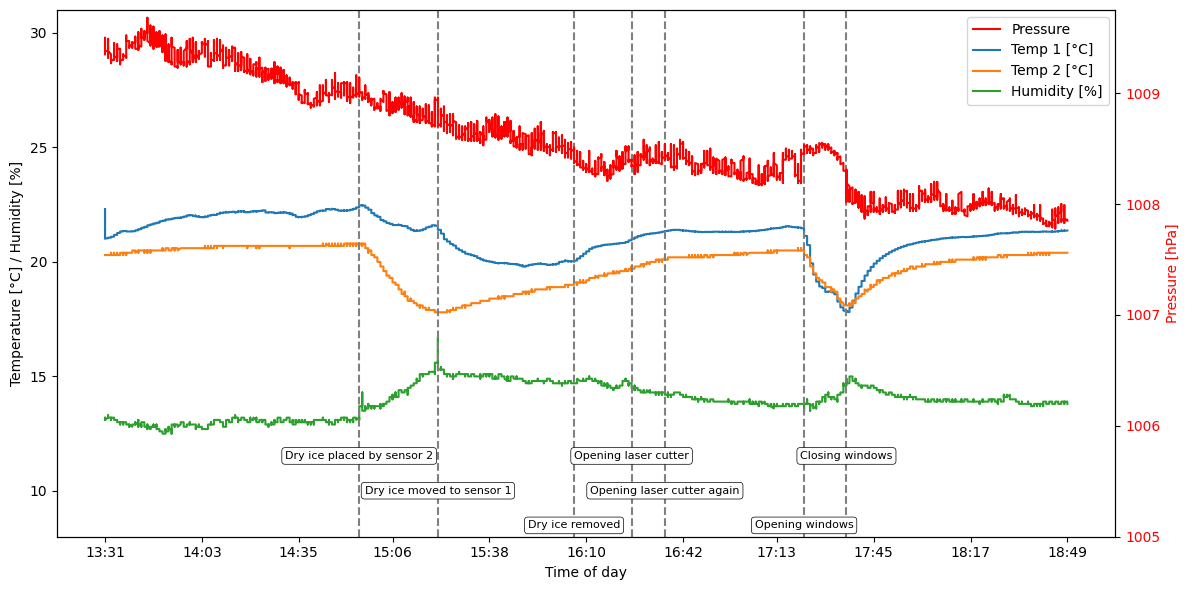

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates

# Assuming df is already defined, as the actual data from 'Test1.csv' is not available in this environment.
df = pd.read_csv('Test1.csv')

events = {"14:55": "Dry ice placed by sensor 2","15:21":"Dry ice moved to sensor 1", "16:06": "Dry ice removed", "16:25": "Opening laser cutter", "16:36": "Opening laser cutter again", "17:22":"Opening windows","17:36":"Closing windows"}

# Sample code modification based on the provided code
df['Time'] = pd.to_datetime(df['Timestamp']).dt.strftime('%H:%M')
df['Pressure2'] = df['Gas'].apply(lambda x: x if x >= 1005 else 1009.5)

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_xlabel('Time of day')
ax1.plot(df['Time'], df['Pressure2'],label="Pressure", color='Red')
ax1.plot(df['Time'], df['Pressure'], label="Temp 1 [°C]")
ax1.plot(df['Time'], df['Temperature1'], label="Temp 2 [°C]")
ax1.plot(df['Time'], df['Humidity'], label="Humidity [%]")
ax1.set_ylim(13, 31)

# Setting 10 x-ticks evenly spaced
ax1.set_xticks(df['Time'][::len(df)//10])
ax1.set_ylabel('Temperature [°C] / Humidity [%]')

ax1.legend(loc='upper right')

ax2 = ax1.twinx()
ax2.set_ylabel('Pressure [hPa]',color='red')
ax2.plot(df['Time'], df['Pressure2'], color='Red')
ax2.set_ylim(1005, 1009.75)
ax2.tick_params(axis='y', labelcolor='Red')
#ax2.legend(loc='upper right')
"""
y_positions = [10, 12]
for time, event in events.items():
    # Add a vertical line (optional)
    ax1.axvline(x=time, color='grey', linestyle='--', ymin=0, ymax=12) # Adjust 'ymin' and 'ymax' as needed

    # Add annotation
    ax1.annotate(event, xy=(time, 10), xytext=(0, -10), 
                textcoords="offset points", ha='left', va='top')
"""
y_positions = [100, 125, 150]
for i, (time, event) in enumerate(events.items()):
    # Choose y position alternating between 10 and 12
    y_pos = y_positions[i % 3]

    # Add a vertical line
    ax1.axvline(x=time, color='grey', linestyle='--', ymin=0, ymax=12)

    # Add annotation at the chosen y position
    ax1.annotate(event, xy=(time, df['Pressure'].min()), xytext=(0, -y_pos),
                textcoords="offset points", ha='center', va='top', fontsize=8,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", linewidth=0.5)
#                arrowprops=dict(arrowstyle="->"))
    )

ax1.set_ylim(bottom=ax1.get_ylim()[0] - 5)
#ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

fig.tight_layout()
plt.show()

TypeError: float() argument must be a string or a real number, not 'datetime.time'

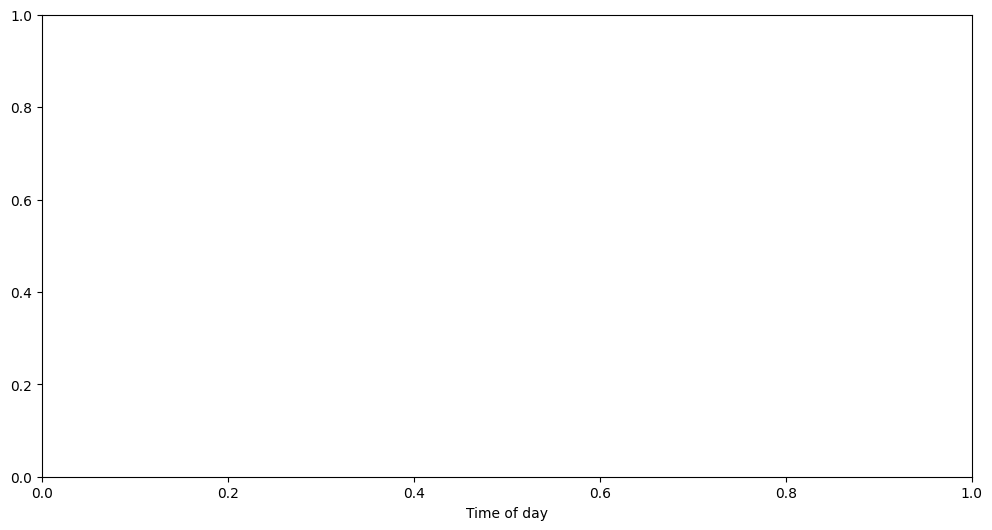

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates

# Assuming df is already defined, as the actual data from 'Test1.csv' is not available in this environment.
df = pd.read_csv('Test1.csv')

events = {"14:55": "Dry ice placed by sensor 2","15:21":"Dry ice moved to sensor 1", "16:06": "Dry ice removed", "16:25": "Opening laser cutter", "16:36": "Opening laser cutter again", "17:22":"Opening windows","17:36":"Closing windows"}

# Sample code modification based on the provided code
df['Time'] = pd.to_datetime(df['Timestamp']).dt.time
df['Pressure2'] = df['Gas'].apply(lambda x: x if x >= 1005 else 1009.5)

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_xlabel('Time of day')
ax1.plot(df['Time'], df['Pressure2'],label="Pressure", color='Red')
ax1.plot(df['Time'], df['Pressure'], label="Temp 1 [°C]")
ax1.plot(df['Time'], df['Temperature1'], label="Temp 2 [°C]")
ax1.plot(df['Time'], df['Humidity'], label="Humidity [%]")
ax1.set_ylim(13, 31)

# Setting 10 x-ticks evenly spaced
#ax1.set_xticks(df['Time'][::len(df)//10])
ax1.set_ylabel('Temperature [°C] / Humidity [%]')

ax1.legend(loc='upper right')

ax2 = ax1.twinx()
ax2.set_ylabel('Pressure [hPa]',color='red')
ax2.plot(df['Time'], df['Pressure2'], color='Red')
ax2.set_ylim(1005, 1009.75)
ax2.tick_params(axis='y', labelcolor='Red')
#ax2.legend(loc='upper right')
"""
y_positions = [10, 12]
for time, event in events.items():
    # Add a vertical line (optional)
    ax1.axvline(x=time, color='grey', linestyle='--', ymin=0, ymax=12) # Adjust 'ymin' and 'ymax' as needed

    # Add annotation
    ax1.annotate(event, xy=(time, 10), xytext=(0, -10), 
                textcoords="offset points", ha='left', va='top')
"""
y_positions = [100, 125, 150]
for i, (time, event) in enumerate(events.items()):
    # Choose y position alternating between 10 and 12
    y_pos = y_positions[i % 3]

    # Add a vertical line
    ax1.axvline(x=time, color='grey', linestyle='--', ymin=0, ymax=12)

    # Add annotation at the chosen y position
    ax1.annotate(event, xy=(time, df['Pressure'].min()), xytext=(0, -y_pos),
                textcoords="offset points", ha='center', va='top', fontsize=8,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", linewidth=0.5)
#                arrowprops=dict(arrowstyle="->"))
    )

ax1.set_ylim(bottom=ax1.get_ylim()[0] - 5)
ax1.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0,30]))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

fig.tight_layout()
plt.show()

In [27]:
df['Time'] = df['Timestamp'].dt.strftime('%H:%M')
df['Time']

0        13:31
1        13:31
2        13:31
3        13:31
4        13:31
         ...  
18477    18:48
18478    18:49
18479    18:49
18480    18:49
18481    18:49
Name: Time, Length: 18482, dtype: object